1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)
* x^2
* (x-1)^2
* x^2 – 1
* x^2+ 1

In [1]:
def f1(x):
  return x**2
  
def f2(x):
  return (x-1)**2

def f3(x):
  return x**2-1
  
def f4(x):
  return x**2+1

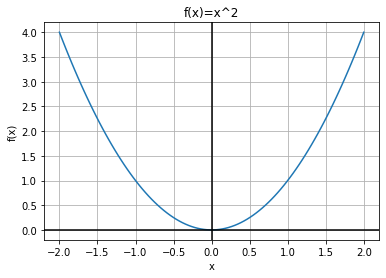

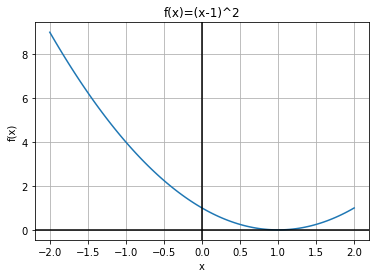

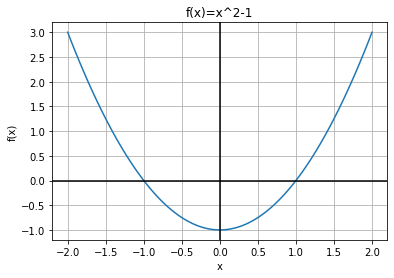

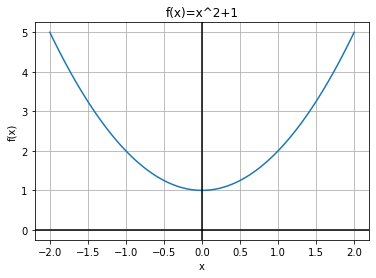

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot(f, title):
  x = np.linspace(-2.0,2.0,100)
  fig, ax = plt.subplots()
  ax.plot(x,f(x))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title('f(x)=' + title)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  
plot(f1, 'x^2')
plot(f2, '(x-1)^2')
plot(f3, 'x^2-1')
plot(f4, 'x^2+1')

2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations
* x^2 = 0
* (x-1)^2 = 0
* x^2 – 1 =0
* x^2+ 1 =0

In [3]:
# Po Shen Loh Method
def PSL (B, C):
  u = (((B**2)/4)-C)**(1/2)
  r1 = -B/2 + u
  r2 = -B/2 - u
  print('r1 = ', r1, 'r2 = ', r2)

PSL(0, 0)
PSL(-2, 1) 
PSL(0, -1)
PSL(0, 1)

r1 =  0.0 r2 =  0.0
r1 =  1.0 r2 =  1.0
r1 =  1.0 r2 =  -1.0
r1 =  (6.123233995736766e-17+1j) r2 =  (-6.123233995736766e-17-1j)


In [4]:
def ClscM (A, B, C):
  r1 = (-B+(B**2-4*A*C)**(1/2))/2*A
  r2 = (-B-(B**2-4*A*C)**(1/2))/2*A
  print('r1 = ', r1, 'r2 = ', r2)

ClscM(1, 0, 0)
ClscM(1, -2, 1) 
ClscM(1, 0, -1)
ClscM(1, 0, 1)

r1 =  0.0 r2 =  0.0
r1 =  1.0 r2 =  1.0
r1 =  1.0 r2 =  -1.0
r1 =  (6.123233995736766e-17+1j) r2 =  (-6.123233995736766e-17-1j)


3. to plot the newton fractals for the corresponding complex quadratic polynomials
* z^2
* (z-1)^2
* z^2 – 1
* z^2+ 1

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

def newton_set1(f,df,a,b,c,
                z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = a
    r2 = b #complex(-0.5, math.sin(2*math.pi/3))
    r3 = c #complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration (znext = z - multiplicidad*f(z) / dz # Newton iteration)

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                    # color blue
                    pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

def display1(f,df,a,b,c,z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(f,df,a,b,c,z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(z)=z**3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


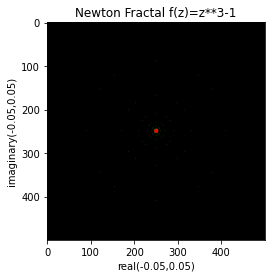

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


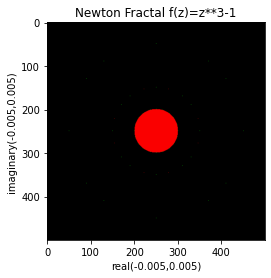

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


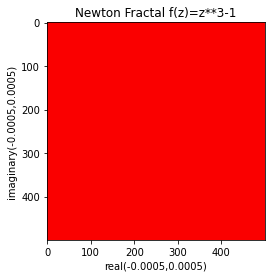

In [6]:
print("zoom out")
def df1(x):
  return 2*x
  
def df2(x):
  return 2*(x-1)

display1(f1, df1, 0, 0, 0, zoom=1/10)
display1(f1, df1, 0, 0, 0, zoom=1/100)
display1(f1, df1, 0, 0, 0, zoom=1/1000)

Z region from ( -500.0 , -500.0 ) to ( 500.0 , 500.0 )


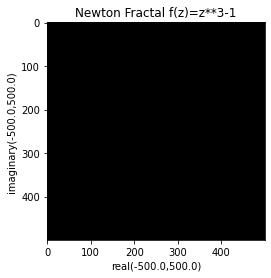

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


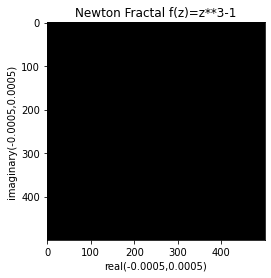

In [7]:
display1(f2, df2, complex(1*math.sin(math.pi/2),0), 0, 0, zoom=1000)
display1(f2, df2, complex(1*math.sin(math.pi/2),0), 0, 0, zoom=1/1000)

Z region from ( -500.0 , -500.0 ) to ( 500.0 , 500.0 )


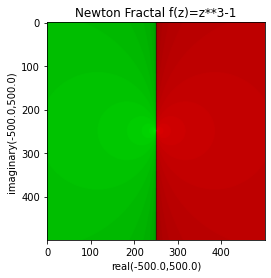

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


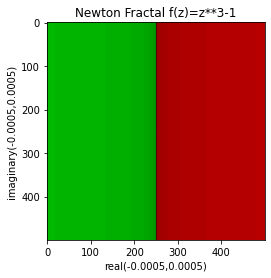

In [8]:
display1(f3, df1, complex(1,0), complex(-1,0), 0, zoom=1000)
display1(f3, df1, complex(1,0), complex(-1,0), 0, zoom=1/1000)

Z region from ( -500.0 , -500.0 ) to ( 500.0 , 500.0 )


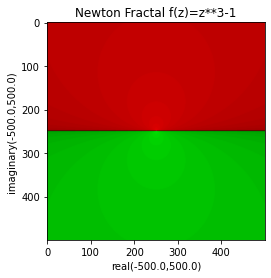

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


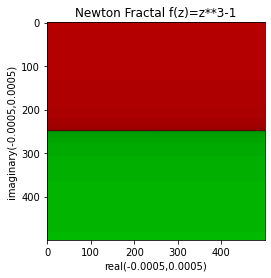

In [9]:
display1(f4, df1, complex(0, 1), complex(0, -1), 0, zoom=1000)
display1(f4, df1, complex(0, 1), complex(0, -1), 0, zoom=1/1000)

4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

In [10]:
def newton_it(f,df,z,title):
  try:
    r=[]
    i=[]
    for k in range(50):
      dz = df(z)
      z = z - f(z) / dz # Newton iteration
      r.append(np.real(z))
      i.append(np.imag(z))
    #print(r[-1], " ", i[-1])
    plt.title('Newton iterates form ' + title)
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()
  except ZeroDivisionError:
    print('Newton iterates form ' + title)

Para cada una de las funciones se escogieron valores de z en los ejes tanto positivo como negativo. Note que para las dos primeras funciones se tomó un valor de 5 en los reales y 15 en los imaginarios. Con cada variación de z se logró obtener las raices de cada polinomio, 

función: x^2


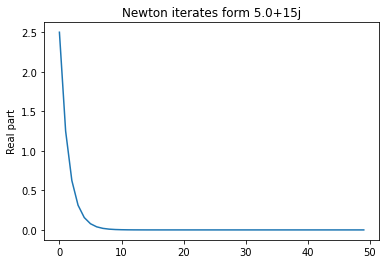

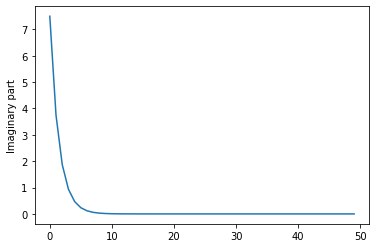

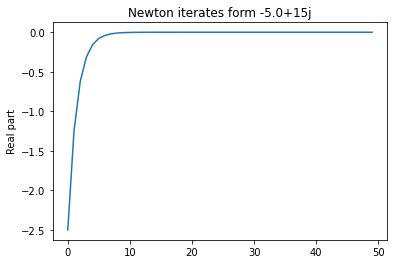

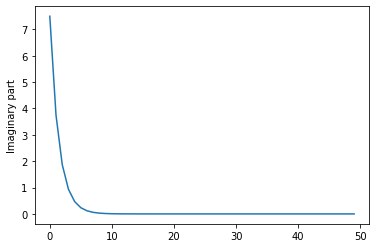

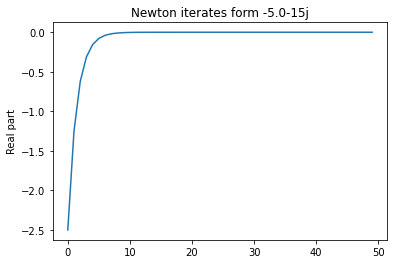

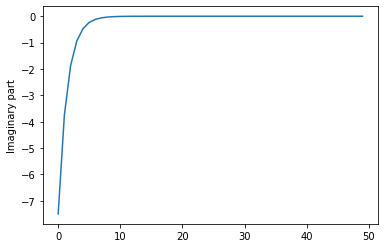

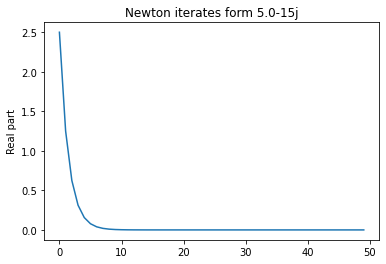

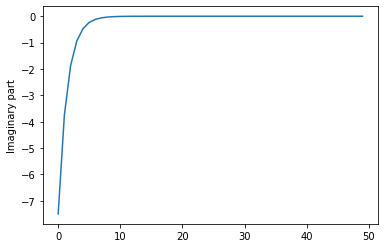

In [11]:
z1 = 5.0
z2 = 15.0j
print('función: x^2')
''' r = 0 '''
newton_it(f1,df1,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f1,df1,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f1,df1,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f1,df1,z1 - z2, str(z1)+'-'+str(z2))

función: (x-1)^2


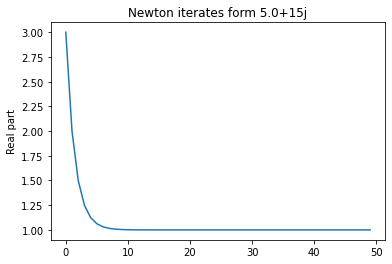

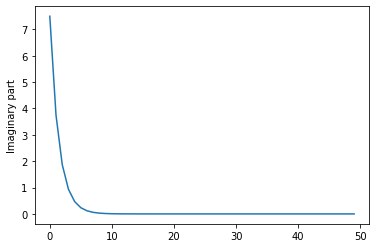

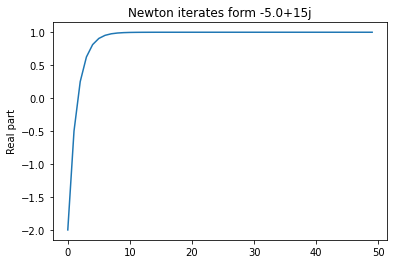

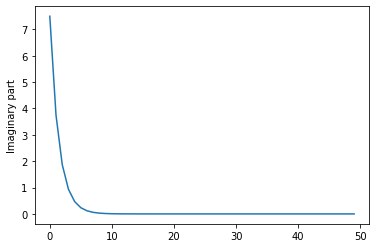

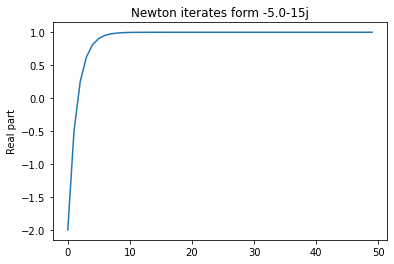

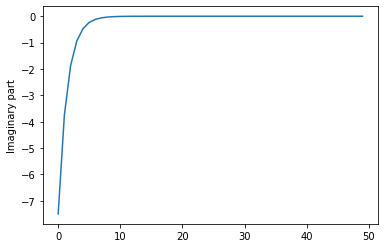

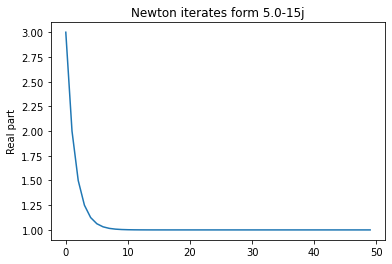

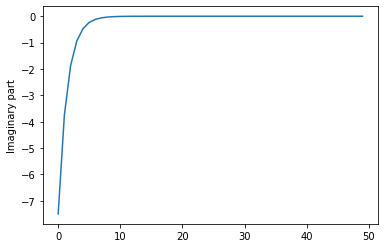

In [12]:
print('función: (x-1)^2')
''' r = 1 '''
newton_it(f2,df2,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f2,df2,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f2,df2,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f2,df2,z1 - z2, str(z1)+'-'+str(z2))

Por otro lado, cuando fijamos uno de los valores, en este caso el de los reales, igual a 0, vemos que las iteraciones fallan. En cuanto a la parte real, como el valor inicial es 0 y la función es polinómica tanto la función como su derivada evaluadas en 0 darán 0 en su primer término y su valor se mantendrá fijo, tal y como vemos en la gráfica de la patrte real la cual se mantiene constante. Mientras que la parte imaginaria a pesar de que si cambia esta es inestable, es decir no coverge a ningún valor, esto se puede deber a que la parte real es igual a 0. Ahora, note que las raices de f = x^2-1 son reales y para ningún z se aproxima la raíz, mientrs que la función f = x^2+1 tiene únicamente raices imaginarias y por tanto si converge a los valores esperados. Cómo se mencionó anteriormente, vemos que al escoger un z con parte imaginaria y sin parte real, aproxima mejor la función con raices imaginarias.

función: x^2-1


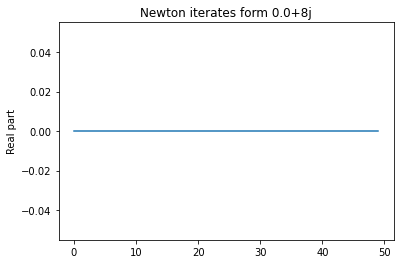

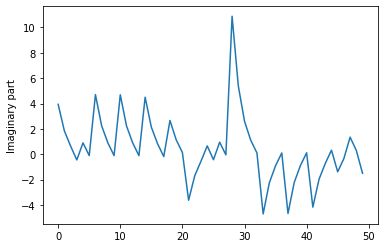

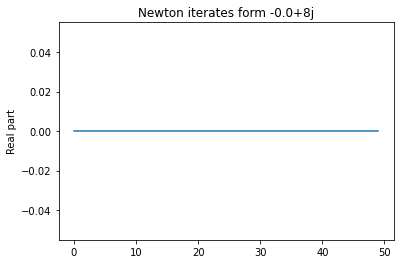

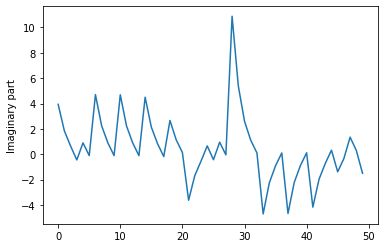

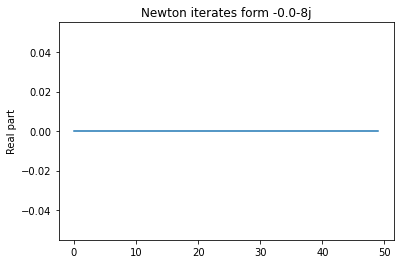

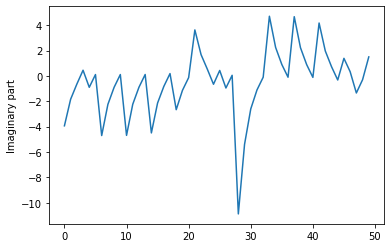

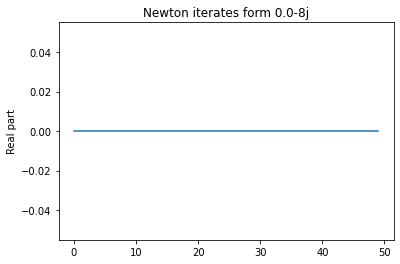

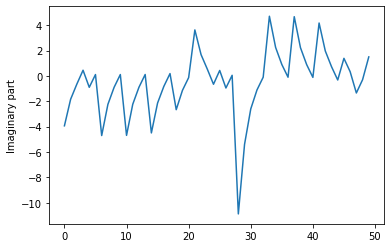

In [13]:
z1 = 0.0
z2 = 8.0j
print('función: x^2-1')
''' r = 1, -1 '''
newton_it(f3,df1,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f3,df1,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f3,df1,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f3,df1,z1 - z2, str(z1)+'-'+str(z2))

función: x^2+1


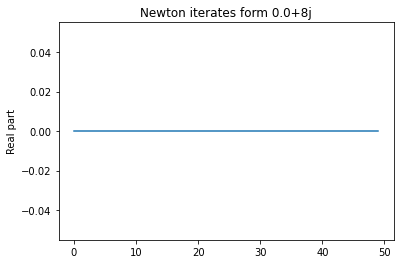

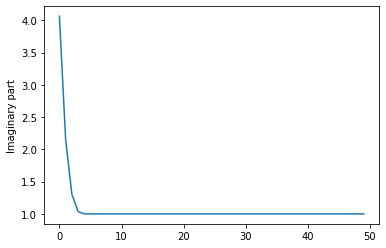

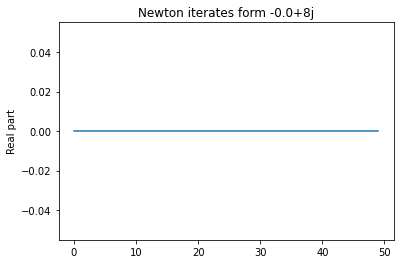

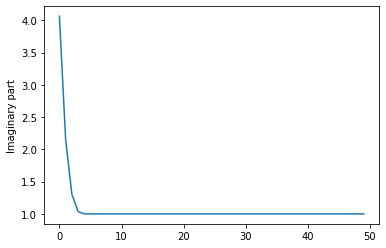

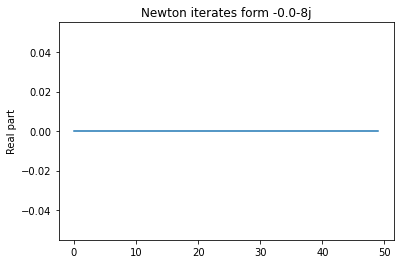

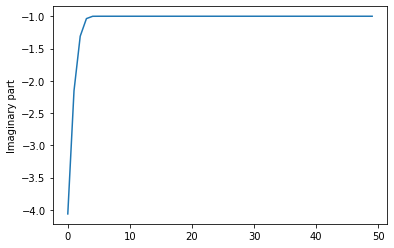

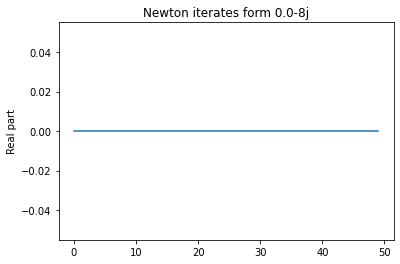

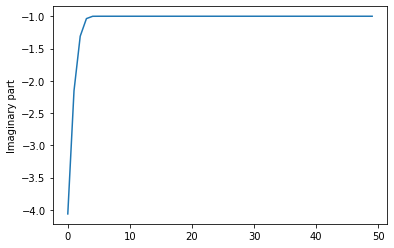

In [14]:
print('función: x^2+1')
''' r = i, -i '''
newton_it(f4,df1,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f4,df1,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f4,df1,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f4,df1,z1 - z2, str(z1)+'-'+str(z2))

5. Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

Al tomar valores en las diagonales vemos que las aproximaciones son más estables, es decir, no presentamos el problema con en valor de z anterior. Notemos que la escogencia de un 0 en la parte real o imaginaria cuando ninguna de sus raices es igual a 0 no es una buena opción, además en el último caso donde z = 0 + 0j vemos que no genera ninguna respuesta, esto se debe a que se genera un error al dividir por 0.

función: x^2


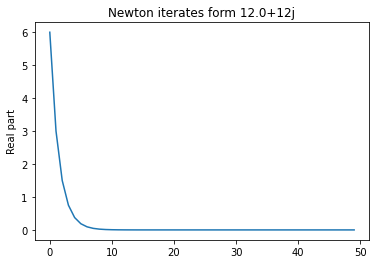

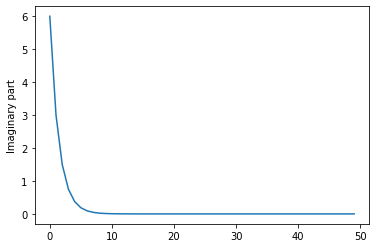

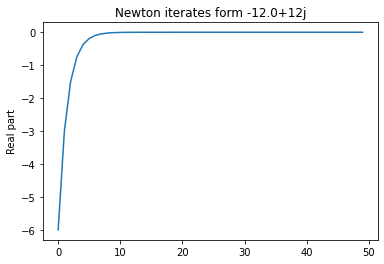

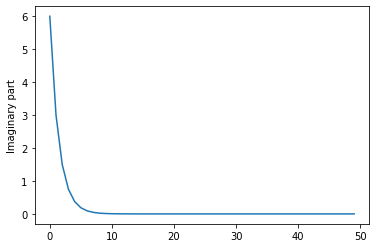

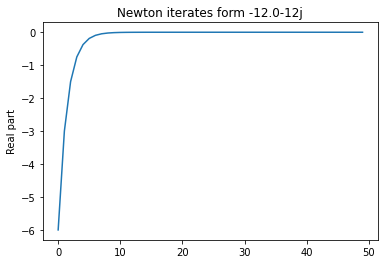

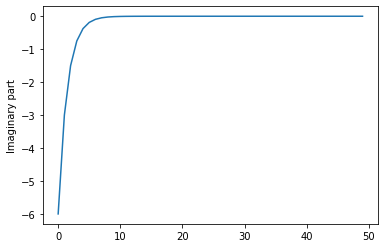

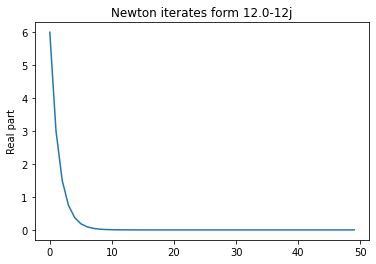

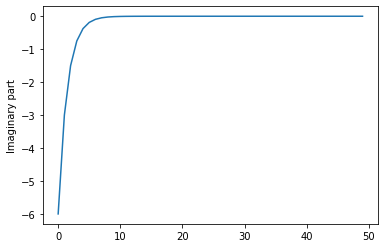

In [15]:
z1 = 12.0
z2 = 12.0j
print('función: x^2')
''' r = 0 '''
newton_it(f1,df1,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f1,df1,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f1,df1,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f1,df1,z1 - z2, str(z1)+'-'+str(z2))

función: (x-1)^2


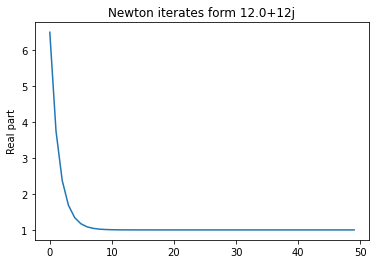

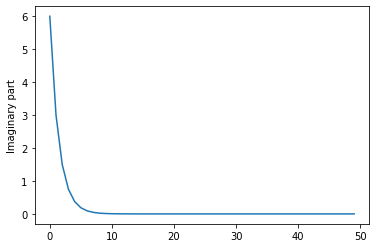

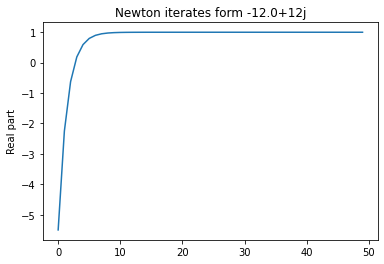

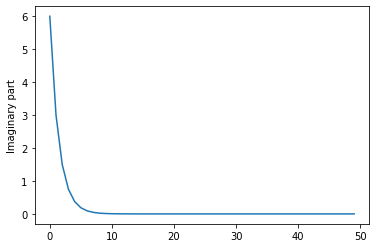

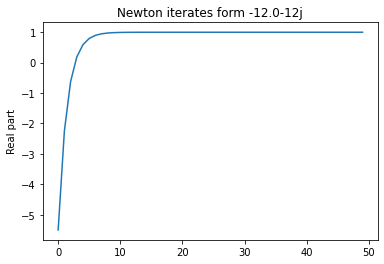

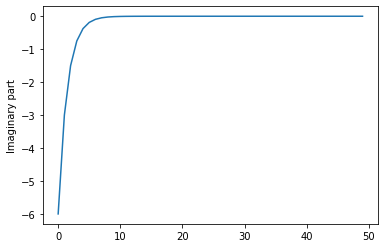

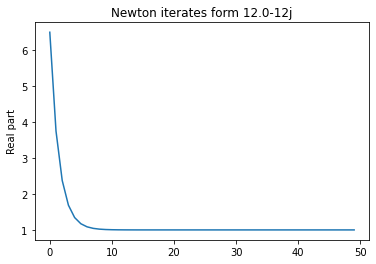

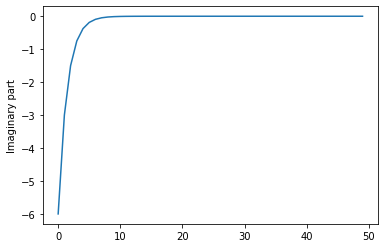

In [16]:
print('función: (x-1)^2')
''' r = 1 '''
newton_it(f2,df2,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f2,df2,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f2,df2,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f2,df2,z1 - z2, str(z1)+'-'+str(z2))

Por último, si detallamos un poco más vemos que al tomar valores más cercanos a los del valor real de la raíz vemos que converge más rápido, es decir, el número de iteraciones necesarias para hallar el valor, es menor si se escoge un valor de z adecuado.

función: x^2-1


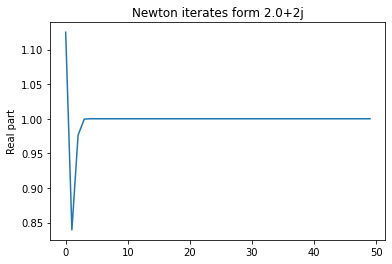

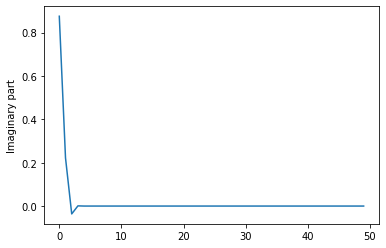

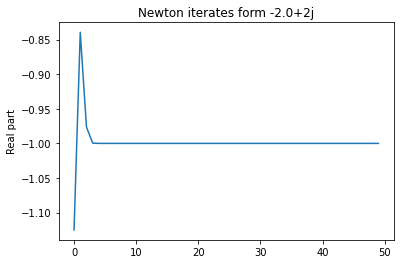

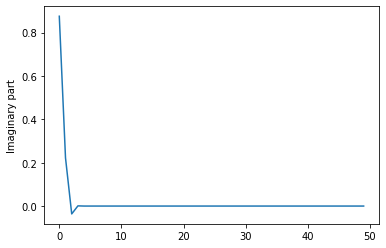

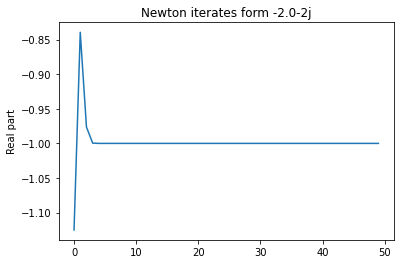

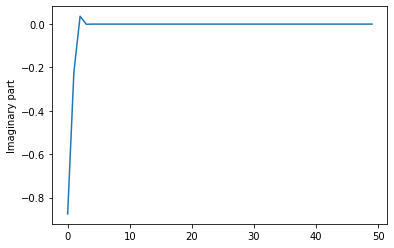

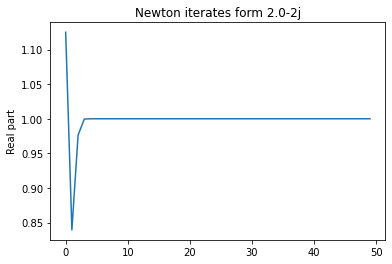

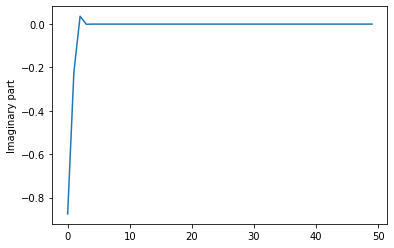

In [17]:
z1 = 2.0
z2 = 2.0j
print('función: x^2-1')
''' r = 1, -1 '''
newton_it(f3,df1,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f3,df1,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f3,df1,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f3,df1,z1 - z2, str(z1)+'-'+str(z2))

función: x^2+1


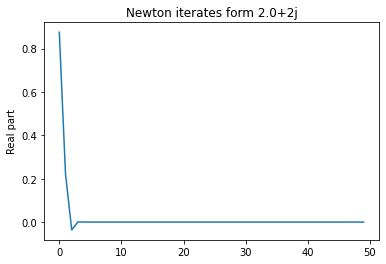

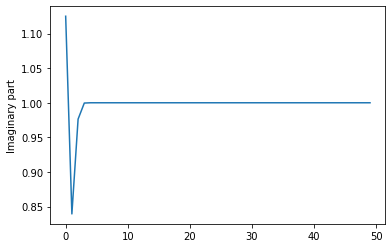

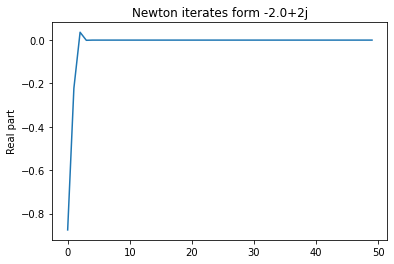

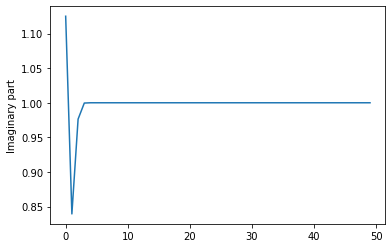

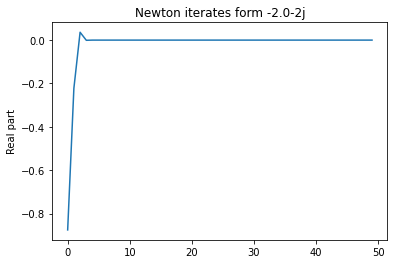

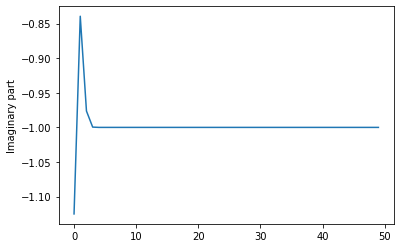

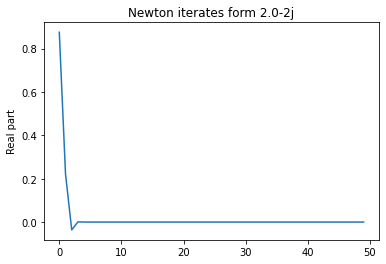

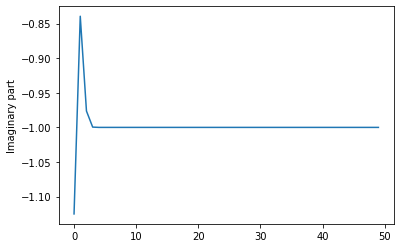

In [18]:
print('función: x^2+1')
''' r = i, -i '''
newton_it(f4,df1,z1 + z2,str(z1)+'+'+str(z2))
newton_it(f4,df1,-z1 + z2,'-'+str(z1)+'+'+str(z2))
newton_it(f4,df1,-z1 - z2,'-'+str(z1)+'-'+str(z2))
newton_it(f4,df1,z1 - z2, str(z1)+'-'+str(z2))

In [19]:
newton_it(f1,df1,0.0 + 0.0j,'0.0 + 0.0j')

Newton iterates form 0.0 + 0.0j
